In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import sklearn

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
diab_df = pd.read_csv('diabetes.csv') # IMPORTING DATASET

In [29]:
diab_df.head() # FIRST FIVE ITEMS

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
# Shape of the Dataset
diab_df.shape

(768, 9)

In [31]:
# Columns of Dataset
diab_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [32]:
diab_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
diab_df.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [35]:
diab_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Changing datatype of 'Outcome' column from integer to object

In [36]:

diab_df['Outcome'] = diab_df['Outcome'].astype(object)


'Blood Pressure', 'Skin Thickness', 'Insulin' & 'BMI' has 0's which means no data has recorded. All 0's are replaced with Nan values

Blood Pressure

In [37]:
diab_df['BloodPressure'].replace(0, np.nan, inplace = True)
diab_df['Insulin'].replace(0, np.nan, inplace = True)
diab_df['BMI'].replace(0, np.nan, inplace = True)

In [38]:
a = diab_df['Pregnancies']
for t in a:
    if t > 10 :
        diab_df['Pregnancies'].replace(t, np.nan, inplace = True)

In Pregnancies column : replace all the values greater than 10 (greater than 10 month of pregnancy is less likely to happen) with NaN values

In [39]:
b = diab_df['BMI']
for u in b:
    if u > 49 :
        diab_df['BMI'].replace(u, np.nan, inplace = True)

In BMI column: replace all the values greater than 49 (BMI greater than 49 for women is not believable) with NaN values

#Checking for Null Values

In [40]:
diab_df.isnull().sum()

Pregnancies                  34
Glucose                       0
BloodPressure                35
SkinThickness                 0
Insulin                     374
BMI                          23
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [41]:
#Imputing BloodPressure column with the column mean
bp_mean = diab_df['BloodPressure'].mean()
diab_df['BloodPressure'] = diab_df['BloodPressure'].fillna(bp_mean)

In [42]:
#Imputing SkinThickness column with column mode
st_mode = statistics.mode(diab_df['SkinThickness'])
diab_df['SkinThickness'] = diab_df['SkinThickness'].fillna(st_mode)

#Imputing Pregnancies column with the median
pr_median = diab_df['Pregnancies'].median()
diab_df['Pregnancies'] = diab_df['Pregnancies'].fillna(pr_median)

#Imputing Insulin column with mode
is_mode = statistics.mode(diab_df['Insulin'])
diab_df['Insulin'] = diab_df['Insulin'].fillna(is_mode)

#Imputing BMI column with column mean
bmi_mean = diab_df['BMI'].mean()
diab_df['BMI'] = diab_df['BMI'].fillna(bmi_mean)

Correlation Matrix

In [43]:
diab_corr = diab_df.corr()
diab_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.133133,0.179237,-0.123420,0.014421,-0.011343,-0.038466,0.502113
Glucose,0.133133,1.000000,0.217728,0.057328,0.403698,0.207705,0.137337,0.263514
BloodPressure,0.179237,0.217728,1.000000,0.006114,0.027149,0.253020,-0.002763,0.324595
SkinThickness,-0.123420,0.057328,0.006114,1.000000,0.240803,0.356999,0.183928,-0.113970
Insulin,0.014421,0.403698,0.027149,0.240803,1.000000,0.183929,0.141959,0.070669
BMI,-0.011343,0.207705,0.253020,0.356999,0.183929,1.000000,0.135574,0.054638
DiabetesPedigreeFunction,-0.038466,0.137337,-0.002763,0.183928,0.141959,0.135574,1.000000,0.033561
Age,0.502113,0.263514,0.324595,-0.113970,0.070669,0.054638,0.033561,1.000000


Heatmap of Correlation Matrix

<AxesSubplot:>

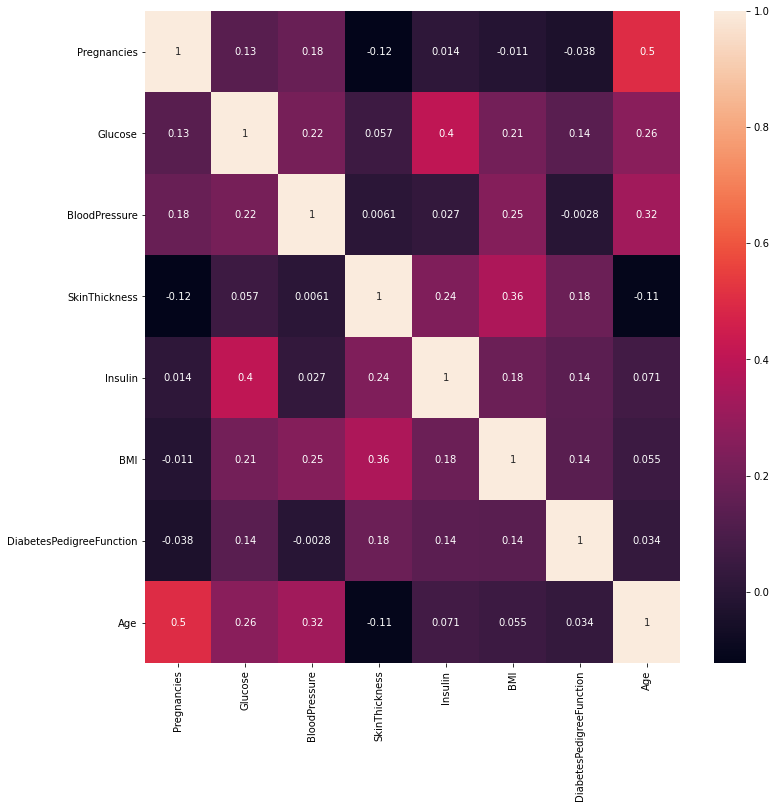

In [44]:
plt.figure(figsize = (12,12))
sns.heatmap(diab_corr, annot = True)

In [45]:
corr=diab_df.corr()


In [46]:
def corelation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = diab_df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [47]:
corr_features=corelation(diab_df,0.7)
len(set(corr_features))             

0

Considerable Correlation Scores

Age & Pregnancies

Glucose & Insulin

BMI & SkinThickness

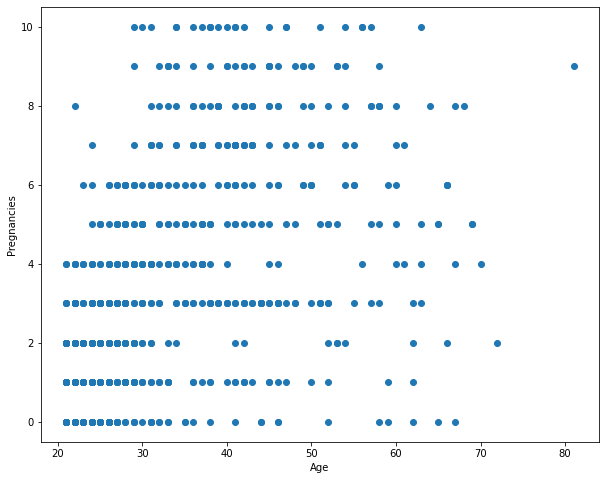

In [48]:
plt.figure(figsize = (10,8))
plt.scatter(diab_df['Age'], diab_df['Pregnancies'])
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.show()

Scatterplot between Glucose & Insulin

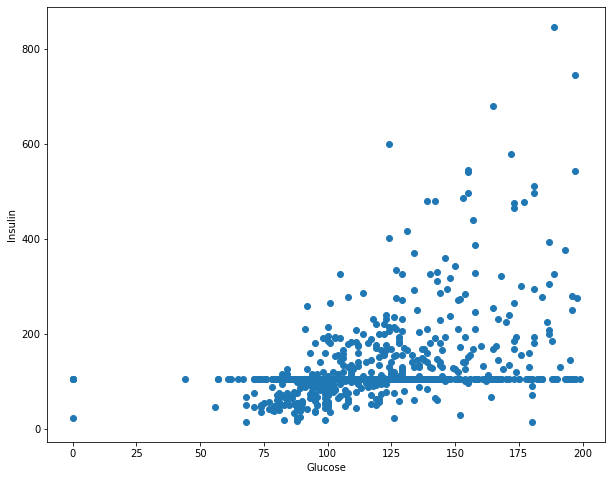

In [49]:
plt.figure(figsize = (10,8))
plt.scatter(diab_df['Glucose'], diab_df['Insulin'])
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

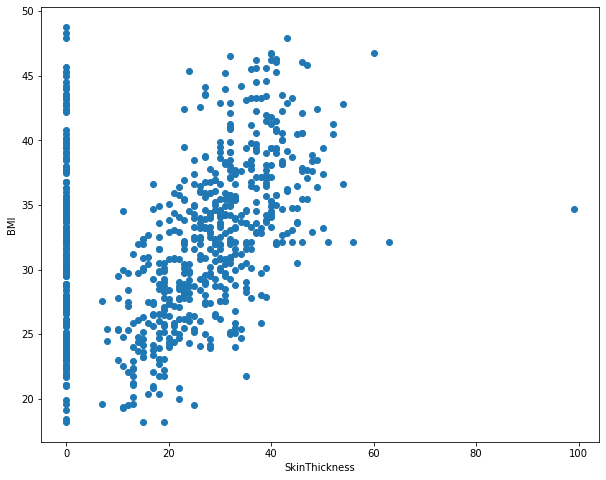

In [50]:
plt.figure(figsize = (10,8))
plt.scatter(diab_df['SkinThickness'], diab_df['BMI'])
plt.xlabel("SkinThickness")
plt.ylabel("BMI")
plt.show()

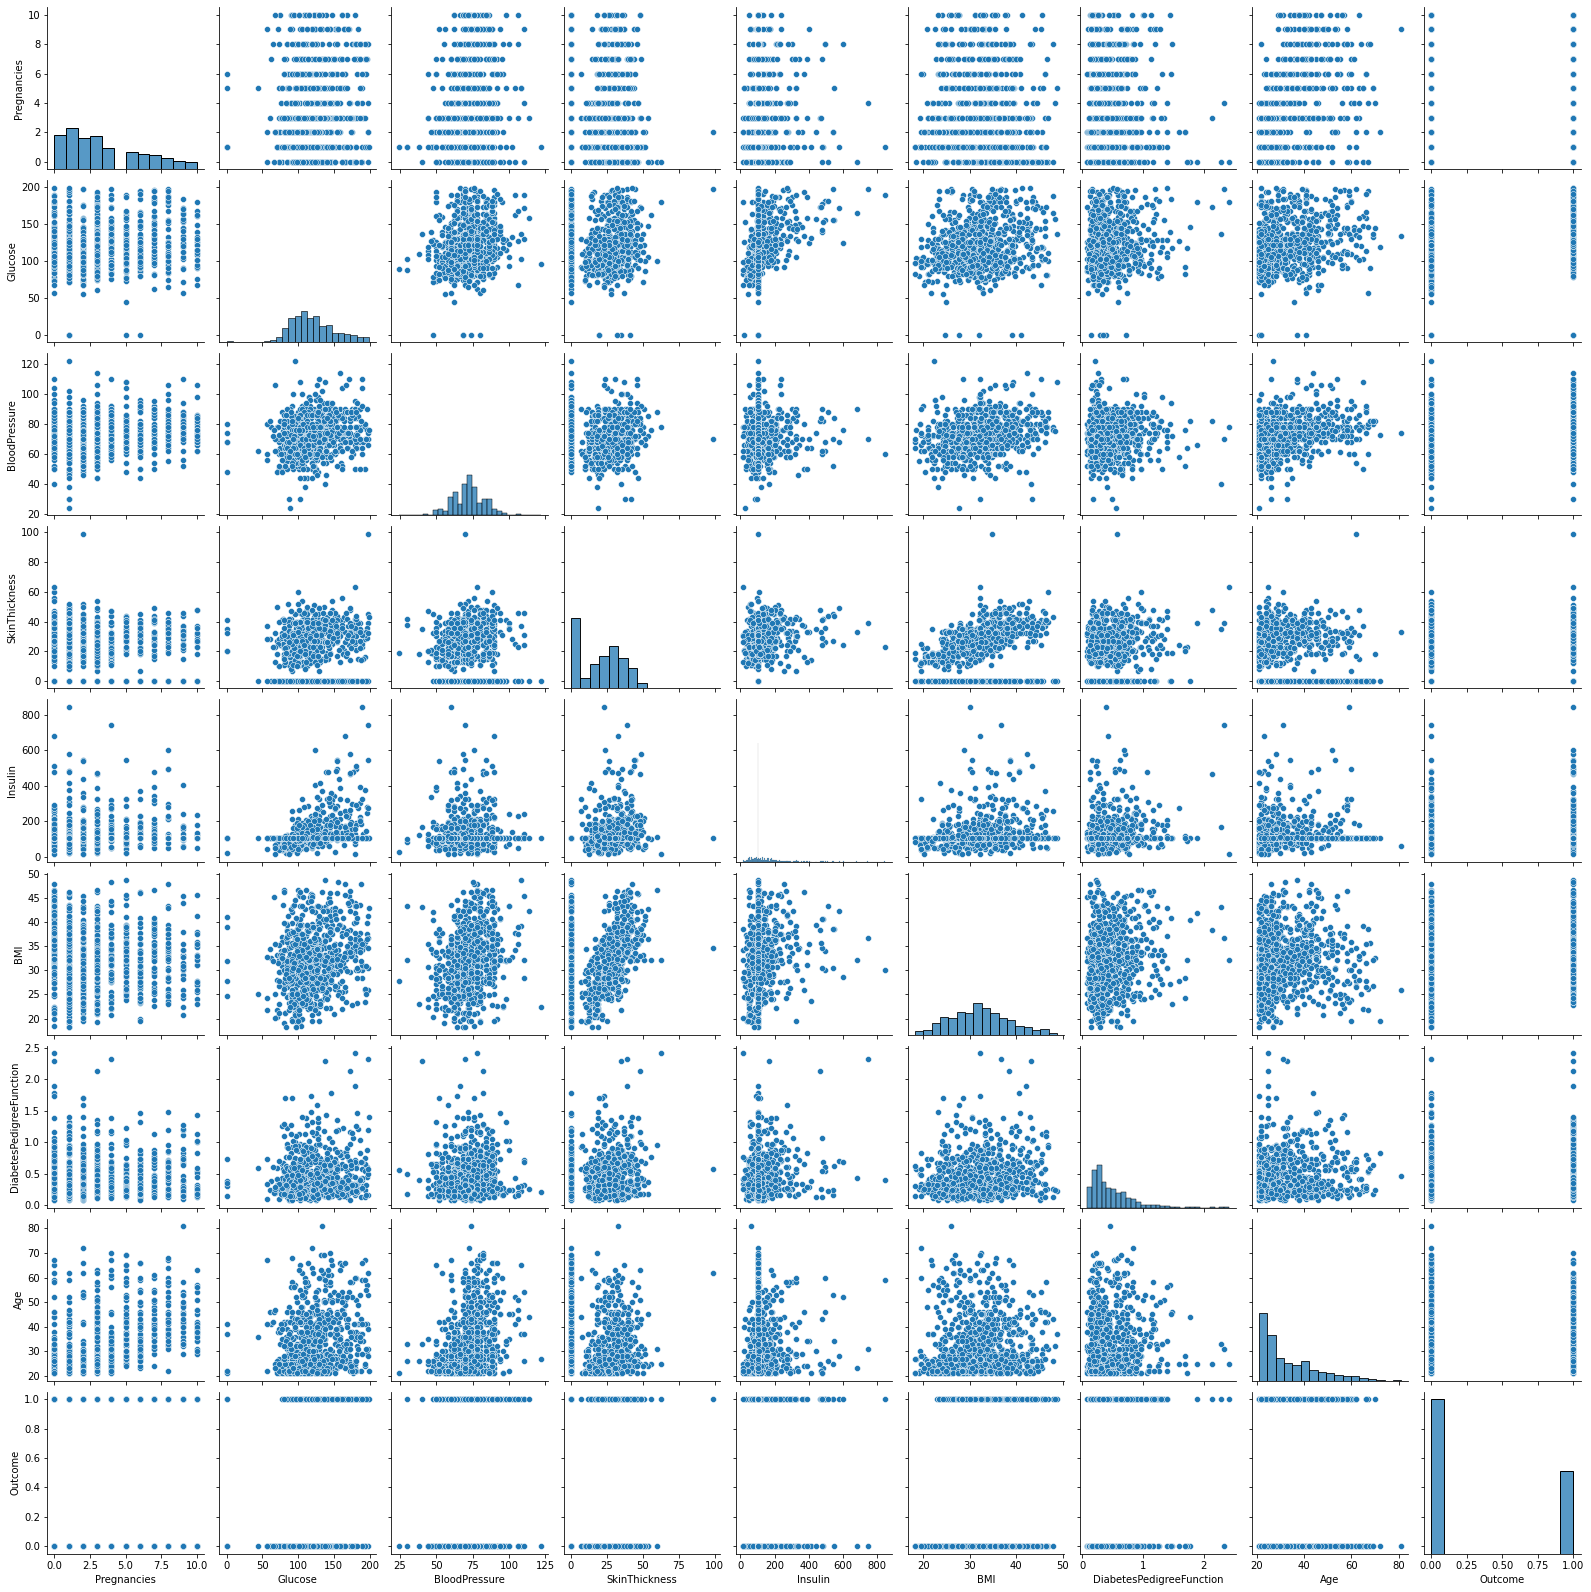

In [51]:
sns.pairplot(diab_df)
plt.show()

In [52]:
num_var = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

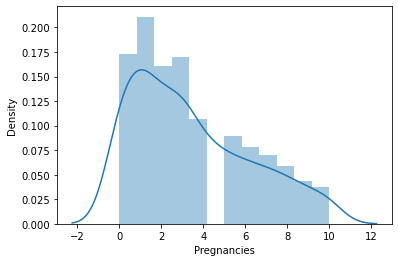

<Figure size 432x288 with 0 Axes>

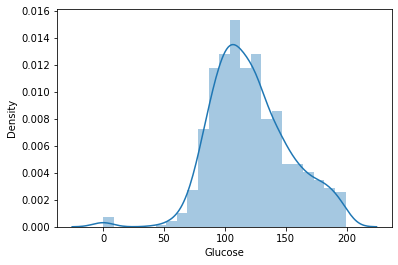

<Figure size 432x288 with 0 Axes>

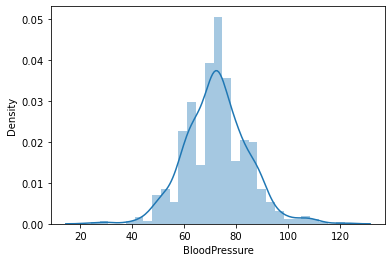

<Figure size 432x288 with 0 Axes>

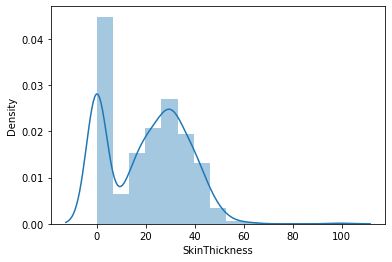

<Figure size 432x288 with 0 Axes>

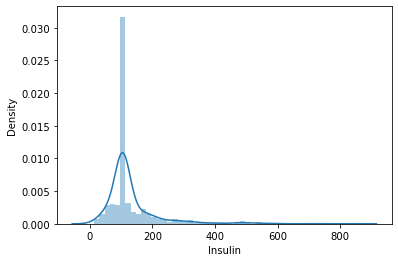

<Figure size 432x288 with 0 Axes>

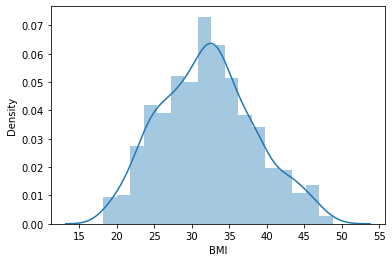

<Figure size 432x288 with 0 Axes>

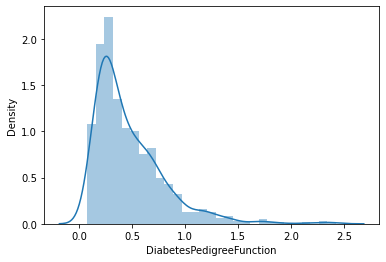

<Figure size 432x288 with 0 Axes>

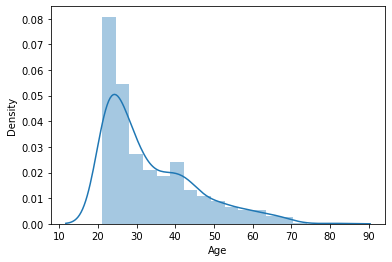

<Figure size 432x288 with 0 Axes>

In [53]:
for i in num_var:
    sns.distplot(diab_df[i])
    plt.figure(i)
    plt.show()

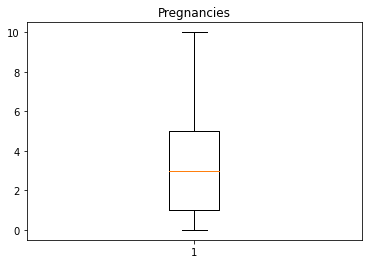

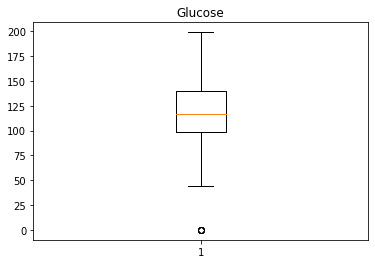

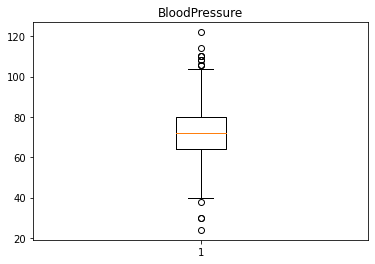

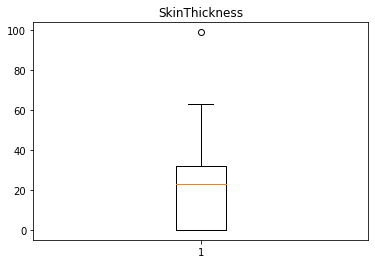

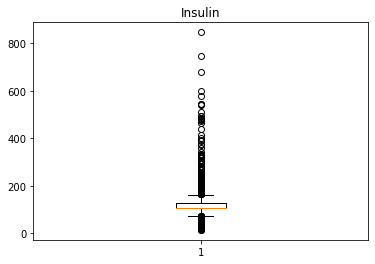

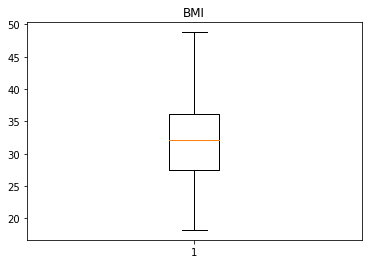

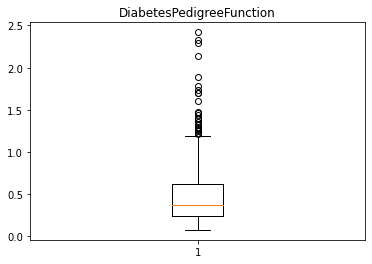

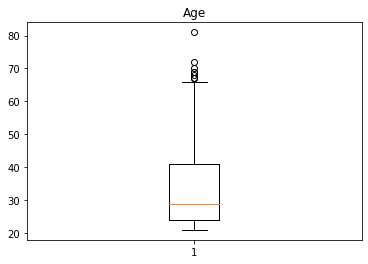

In [54]:
for j in num_var:
    plt.boxplot(diab_df[j])
    plt.title(j)
    plt.show()

Dividing Predictor Variables & Response Variable

In [55]:
X = diab_df.iloc[:,:-1].values
y = diab_df.iloc[:,-1].values

In [56]:
# Changing datatype of response variable from 'object' to 'integer'
y = y.astype(int)

# Splitting into test & training sets

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [58]:
X_train , y_train

(array([[0.00000000e+00, 1.51000000e+02, 9.00000000e+01, ...,
         4.21000000e+01, 3.71000000e-01, 2.10000000e+01],
        [1.00000000e+00, 8.30000000e+01, 6.80000000e+01, ...,
         1.82000000e+01, 6.24000000e-01, 2.70000000e+01],
        [2.00000000e+00, 1.22000000e+02, 7.00000000e+01, ...,
         3.68000000e+01, 3.40000000e-01, 2.70000000e+01],
        ...,
        [4.00000000e+00, 9.40000000e+01, 6.50000000e+01, ...,
         2.47000000e+01, 1.48000000e-01, 2.10000000e+01],
        [3.00000000e+00, 8.50000000e+01, 7.40000000e+01, ...,
         3.01000000e+01, 3.00000000e-01, 3.50000000e+01],
        [5.00000000e+00, 1.36000000e+02, 8.20000000e+01, ...,
         3.21103356e+01, 6.40000000e-01, 6.90000000e+01]]),
 array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [59]:
X_test , y_test

(array([[1.000e+00, 1.990e+02, 7.600e+01, ..., 4.290e+01, 1.394e+00,
         2.200e+01],
        [2.000e+00, 1.070e+02, 7.400e+01, ..., 3.360e+01, 4.040e-01,
         2.300e+01],
        [4.000e+00, 7.600e+01, 6.200e+01, ..., 3.400e+01, 3.910e-01,
         2.500e+01],
        ...,
        [1.000e+00, 9.500e+01, 6.000e+01, ..., 2.390e+01, 2.600e-01,
         2.200e+01],
        [1.000e+00, 1.060e+02, 7.600e+01, ..., 3.750e+01, 1.970e-01,
         2.600e+01],
        [1.000e+01, 1.220e+02, 7.800e+01, ..., 2.760e+01, 5.120e-01,
         4.500e+01]]),
 array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
 

# Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [61]:
X_train

array([[-1.21174709,  0.9144385 ,  1.42744524, ...,  1.5386485 ,
        -0.3002719 , -1.05654479],
       [-0.85867699, -1.19655127, -0.42391913, ..., -2.23613162,
         0.45699051, -0.55622332],
       [-0.5056069 ,  0.01416345, -0.25561327, ...,  0.70156337,
        -0.39305899, -0.55622332],
       ...,
       [ 0.20053329, -0.85506763, -0.6763779 , ..., -1.20951778,
        -0.96774035, -1.05654479],
       [-0.1525368 , -1.13446334,  0.08099843, ..., -0.35663859,
        -0.51278428,  0.11087198],
       [ 0.55360339,  0.44877899,  0.75422183, ..., -0.039125  ,
         0.50488062,  2.94602702]])

In [62]:
X_test

array([[-0.87381139,  2.54476915,  0.40748633, ...,  1.85643049,
         2.84152033, -0.92178738],
       [-0.51464692, -0.39587758,  0.24657434, ...,  0.33738123,
        -0.21344264, -0.83179039],
       [ 0.20368201, -1.38674767, -0.71889759, ...,  0.40271668,
        -0.25355832, -0.6517964 ],
       ...,
       [-0.87381139, -0.7794402 , -0.87980957, ..., -1.24700347,
        -0.6578009 , -0.92178738],
       [-0.87381139, -0.42784113,  0.40748633, ...,  0.97440189,
        -0.85220763, -0.56179941],
       [ 2.35866882,  0.08357569,  0.56839832, ..., -0.64265054,
         0.11982604,  1.14814346]])

# Logistic Regression¶

Training the Logistic Regression model on the Training set

In [63]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state = 0)
logit.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [64]:
# Predicting the Test set results
y_pred_logit = logit.predict(X_test)

Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix
cm_logit = confusion_matrix(y_test, y_pred_logit)
print(cm_logit)

[[135  22]
 [ 37  37]]


Text(33.0, 0.5, 'True')

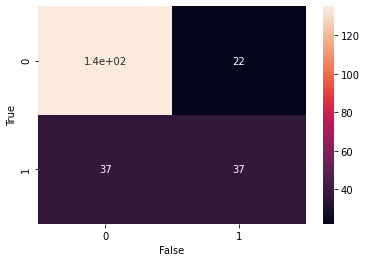

In [115]:
sns.heatmap(cm_logit,annot=True)
plt.xlabel('False')
plt.ylabel('True')

In [66]:
from sklearn.metrics import accuracy_score
accuracy_logit = accuracy_score(y_test, y_pred_logit)

In [67]:
print((accuracy_logit*100) ,"%")

74.45887445887446 %


Classification Score

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logit))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       157
           1       0.63      0.50      0.56        74

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.74       231




K-fold Cross validation

Cross-validation is a statistical method used to estimate the skill of machine learning models.

It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

In [69]:
from sklearn.model_selection import cross_val_score
accuracies_logit = cross_val_score(estimator = logit, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_logit.mean()*100))  
print("Standard Deviation: {:.2f} %".format(accuracies_logit.std()*100))

Accuracy: 75.97 %
Standard Deviation: 3.87 %


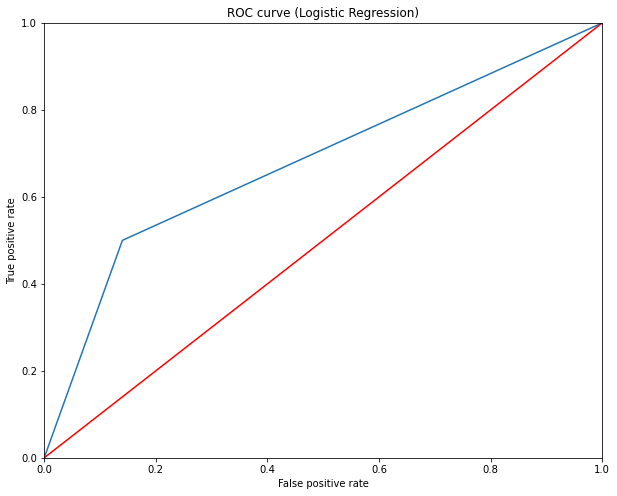

In [70]:
#ROC Curve
from sklearn.metrics import roc_curve
plt.figure(figsize = (10,8))
fpr_logit, tpr_logit, thresholds = roc_curve(y_test, y_pred_logit)
plt.plot(fpr_logit,tpr_logit,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_logit))
plt.plot([0,1], [0,1], color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (Logistic Regression)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# Random Forest
Training the Random Forest Classification model on the Training set

In [71]:
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rt.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [72]:
# Predicting the Test set results
y_pred_rt = rt.predict(X_test)

In [73]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rt = confusion_matrix(y_test, y_pred_rt)
print(cm_rt)

[[135  22]
 [ 35  39]]


In [74]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_rt = accuracy_score(y_test, y_pred_rt)

In [75]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rt))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       157
           1       0.64      0.53      0.58        74

    accuracy                           0.75       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.75      0.75       231



In [76]:
from sklearn.model_selection import cross_val_score
accuracies_rt = cross_val_score(estimator = rt, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_rt.mean()*100))  
print("Standard Deviation: {:.2f} %".format(accuracies_rt.std()*100))

Accuracy: 72.26 %
Standard Deviation: 6.96 %


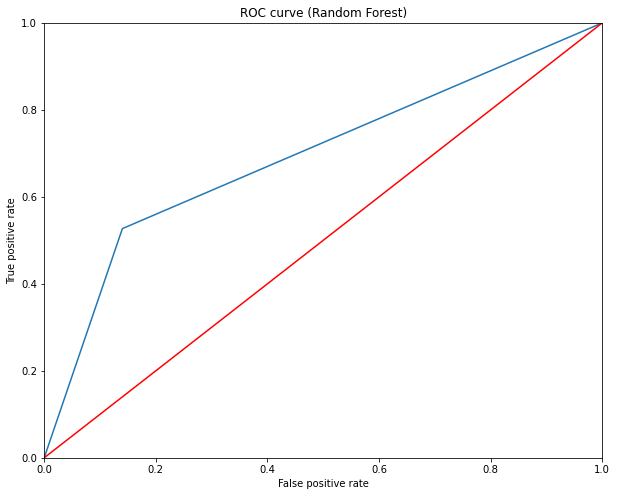

In [77]:
from sklearn.metrics import roc_curve
plt.figure(figsize = (10,8))
fpr_rt, tpr_rt, thresholds = roc_curve(y_test, y_pred_rt)
plt.plot(fpr_rt,tpr_rt,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_rt))
plt.plot([0,1], [0,1], color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (Random Forest)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# K Nearest Neibour (KNN)
Initiating a for loop to calculate best ROC-AUC score of different number of neighbour cells

The number of Neighbour(K) with highest AUC Score will be selected

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
error_rate=[]
li=[]
result={}
for i in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predi=knn.predict(X_test)
    li.append(i)
    error_rate.append(np.mean(predi!= y_test))

In [80]:
result.update({'k':li})
result.update({'error_rate':error_rate})
result_k=pd.DataFrame(result)
result_k.sort_values('error_rate').head()

,k,error_rate
13,14,0.203463
14,15,0.207792
21,22,0.207792
15,16,0.207792
12,13,0.207792


Text(0.5, 0, 'n_neighbors')

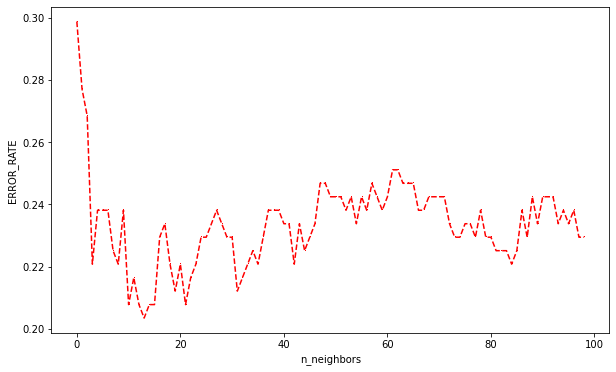

In [81]:
import matplotlib.pyplot as plt  #VISUALISING THE ERROR_RATE
plt.figure(figsize=(10,6))
plt.plot(error_rate,'r,--')
plt.ylabel("ERROR_RATE")
plt.xlabel('n_neighbors')

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [83]:
knn.score(X_test,y_test)

0.7792207792207793

In [84]:
# Predicting the Test set results
y_pred_knn = knn.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[138  19]
 [ 32  42]]


In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       157
           1       0.69      0.57      0.62        74

    accuracy                           0.78       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.78      0.77       231



In [87]:
from sklearn.model_selection import cross_val_score
accuracies_knn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_knn.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_knn.std()*100))

Accuracy: 72.80 %
Standard Deviation: 6.65 %


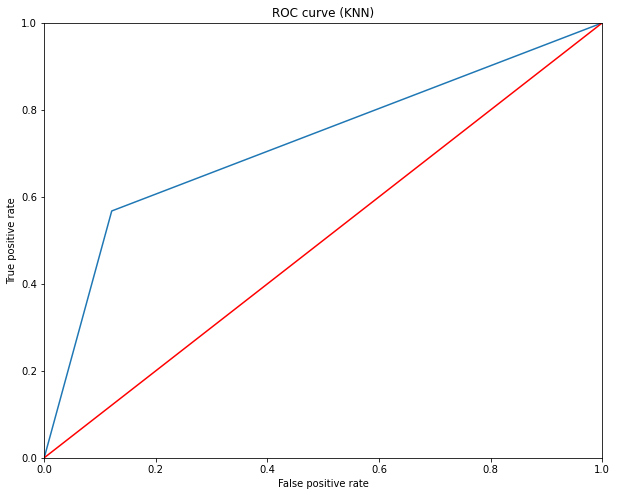

In [88]:
from sklearn.metrics import roc_curve
plt.figure(figsize = (10,8))
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_knn)
plt.plot(fpr_knn,tpr_knn,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_knn))
plt.plot([0,1], [0,1], color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (KNN)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# Naive Bayes
Training the Naive Bayes model on the Training set

In [89]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [90]:
# Predicting the Test set results
y_pred_nb = nb.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

[[130  27]
 [ 36  38]]


In [92]:
from sklearn.metrics import accuracy_score
accuracy_nb = accuracy_score(y_test, y_pred_nb)

In [93]:
print((accuracy_nb*100),"%")

72.72727272727273 %


In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       157
           1       0.58      0.51      0.55        74

    accuracy                           0.73       231
   macro avg       0.68      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



In [95]:
from sklearn.model_selection import cross_val_score
accuracies_nb = cross_val_score(estimator = nb, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_nb.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_nb.std()*100))

Accuracy: 73.74 %
Standard Deviation: 5.71 %


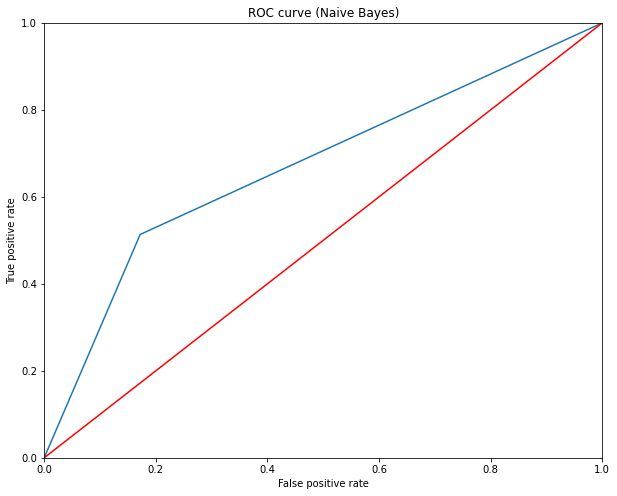

In [96]:
from sklearn.metrics import roc_curve
plt.figure(figsize = (10,8))
fpr_nb, tpr_nb, thresholds = roc_curve(y_test, y_pred_nb)
plt.plot(fpr_nb,tpr_nb,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_nb))
plt.plot([0,1], [0,1], color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (Naive Bayes)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# Kernel SVM
Training the Kernel SVM model on the Training set

In [97]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [98]:
# Predicting the Test set results
y_pred_svm = svm.predict(X_test)

Confusion Matrix

In [99]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[136  21]
 [ 36  38]]


Accuracy Score

In [100]:
from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print((accuracy_svm*100),"%")

75.32467532467533 %


In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       157
           1       0.64      0.51      0.57        74

    accuracy                           0.75       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



In [102]:
from sklearn.model_selection import cross_val_score
accuracies_svm = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_svm.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_svm.std()*100))

Accuracy: 76.34 %
Standard Deviation: 4.54 %


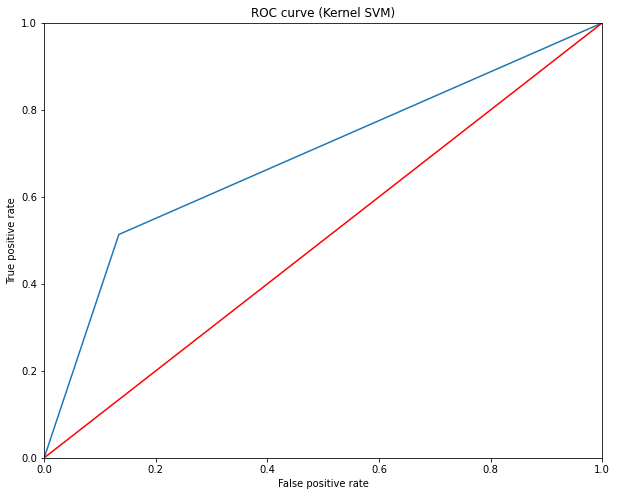

In [103]:
from sklearn.metrics import roc_curve
plt.figure(figsize = (10,8))
fpr_svm, tpr_svm, thresholds = roc_curve(y_test, y_pred_svm)
plt.plot(fpr_svm,tpr_svm,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_svm))
plt.plot([0,1], [0,1], color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (Kernel SVM)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

# Decision Tree
Training the Decision Tree Classification model on the Training set

In [104]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [105]:
# Predicting the Test set results
y_pred_dt = dt.predict(X_test)


Confusion Matrix

In [106]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[116  41]
 [ 27  47]]



Accuracy Score

In [107]:
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [108]:
print((accuracy_dt*100),"%")

70.56277056277057 %


In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       157
           1       0.53      0.64      0.58        74

    accuracy                           0.71       231
   macro avg       0.67      0.69      0.68       231
weighted avg       0.72      0.71      0.71       231



In [110]:
from sklearn.model_selection import cross_val_score
accuracies_dt = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_dt.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_dt.std()*100))

Accuracy: 65.19 %
Standard Deviation: 5.03 %


ROC CURVE

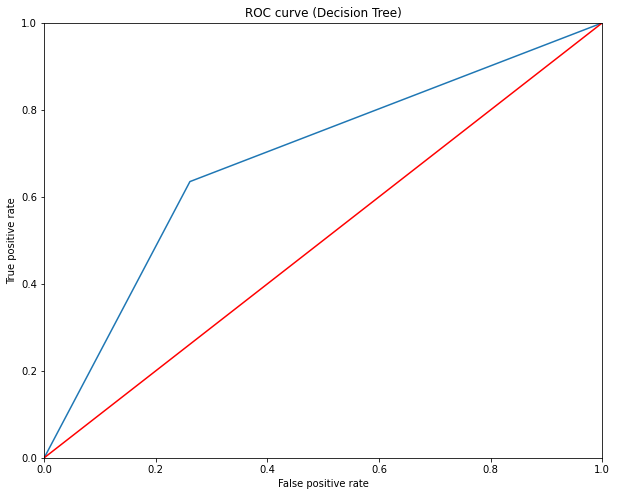

In [111]:
from sklearn.metrics import roc_curve
plt.figure(figsize = (10,8))
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_dt)
plt.plot(fpr_dt,tpr_dt,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred_dt))
plt.plot([0,1], [0,1], color = 'red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve (Decision Tree)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()